In [0]:
# importing libraries
import os
import io
import warnings

import numpy as np
#np.seterr(divide='ignore', invalid='ignore')
import scipy as sp
import pandas as pd
#import time as time
from datetime import datetime

import sklearn as sk

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import seaborn as sborn
import matplotlib.pyplot as plt 
from scipy.stats import norm 
import io
import requests

warnings.simplefilter(action='ignore', category=FutureWarning)

In [0]:
crime_ds=pd.read_csv("Crime_Data.csv")

# New Section

In [268]:
crime_ds.describe()

,Report Number,Occurred Time,Reported Time
count,5.235910e+05,523589.000000,523589.000000
mean,1.634634e+13,1358.647834,1353.365256
std,7.421091e+12,688.350593,589.365021
min,2.008000e+08,0.000000,0.000000
25%,2.008000e+13,900.000000,950.000000
50%,2.012000e+13,1500.000000,1407.000000
75%,2.016000e+13,1920.000000,1817.000000
max,2.019000e+13,2359.000000,2359.000000


In [269]:
crime_ds.head(10)

,Report Number,Occurred Date,Occurred Time,Reported Date,Reported Time,Crime Subcategory,Primary Offense Description,Precinct,Sector,Beat,Neighborhood
0,20080000465209,12/13/1908,2114.0,12/13/2008,2114.0,DUI,DUI-LIQUOR,EAST,G,G2,CENTRAL AREA/SQUIRE PARK
1,20100000202011,06/15/1964,0.0,06/15/2010,1031.0,FAMILY OFFENSE-NONVIOLENT,CHILD-OTHER,WEST,Q,Q2,QUEEN ANNE
2,2012000023437,01/01/1973,0.0,01/25/2012,1048.0,SEX OFFENSE-OTHER,SEXOFF-OTHER,NORTH,N,N2,NORTHGATE
3,20130000327785,06/01/1974,0.0,09/09/2013,1117.0,SEX OFFENSE-OTHER,SEXOFF-OTHER,UNKNOWN,NaN,NaN,UNKNOWN
4,20160000289384,01/01/1975,0.0,08/11/2016,1054.0,SEX OFFENSE-OTHER,SEXOFF-OTHER,UNKNOWN,NaN,NaN,UNKNOWN
5,1975000079415,12/16/1975,900.0,12/16/1975,1500.0,BURGLARY-RESIDENTIAL,BURGLARY-FORCE-RES,SOUTH,R,R3,LAKEWOOD/SEWARD PARK
6,1976000069169,01/01/1976,1.0,01/31/1976,2359.0,SEX OFFENSE-OTHER,SEXOFF-INDECENT LIBERTIES,UNKNOWN,NaN,NaN,UNKNOWN
7,20170000474905,07/01/1976,800.0,12/27/2017,1519.0,SEX OFFENSE-OTHER,SEXOFF-INDECENT LIBERTIES,UNKNOWN,NaN,NaN,UNKNOWN
8,20180000183590,01/01/1977,0.0,05/22/2018,1328.0,RAPE,SEXOFF-SODOMY,UNKNOWN,NaN,NaN,UNKNOWN
9,20090000300201,01/01/1978,1.0,08/25/2009,1016.0,SEX OFFENSE-OTHER,SEXOFF-OTHER,SOUTHWEST,W,W1,ALKI


In [270]:
crime_ds.isna().sum()

Report Number                     0
Occurred Date                     2
Occurred Time                     2
Reported Date                     0
Reported Time                     2
Crime Subcategory               262
Primary Offense Description       0
Precinct                          6
Sector                         3346
Beat                           3298
Neighborhood                      0
dtype: int64

In [271]:
crime_ds.dropna()

,Report Number,Occurred Date,Occurred Time,Reported Date,Reported Time,Crime Subcategory,Primary Offense Description,Precinct,Sector,Beat,Neighborhood
0,20080000465209,12/13/1908,2114.0,12/13/2008,2114.0,DUI,DUI-LIQUOR,EAST,G,G2,CENTRAL AREA/SQUIRE PARK
1,20100000202011,06/15/1964,0.0,06/15/2010,1031.0,FAMILY OFFENSE-NONVIOLENT,CHILD-OTHER,WEST,Q,Q2,QUEEN ANNE
2,2012000023437,01/01/1973,0.0,01/25/2012,1048.0,SEX OFFENSE-OTHER,SEXOFF-OTHER,NORTH,N,N2,NORTHGATE
5,1975000079415,12/16/1975,900.0,12/16/1975,1500.0,BURGLARY-RESIDENTIAL,BURGLARY-FORCE-RES,SOUTH,R,R3,LAKEWOOD/SEWARD PARK
9,20090000300201,01/01/1978,1.0,08/25/2009,1016.0,SEX OFFENSE-OTHER,SEXOFF-OTHER,SOUTHWEST,W,W1,ALKI
...,...,...,...,...,...,...,...,...,...,...,...
523584,20190000905003,05/07/2019,510.0,05/07/2019,936.0,CAR PROWL,THEFT-CARPROWL,WEST,K,K1,DOWNTOWN COMMERCIAL
523585,20190000162720,05/07/2019,149.0,05/07/2019,149.0,DUI,DUI-DRUGS,EAST,E,E3,CAPITOL HILL
523586,20190000905017,05/07/2019,100.0,05/07/2019,1218.0,THEFT-BICYCLE,THEFT-BICYCLE,NORTH,B,B2,FREMONT
523587,20190000162691,05/07/2019,28.0,05/07/2019,28.0,TRESPASS,TRESPASS,WEST,Q,Q2,QUEEN ANNE


In [0]:
crime= crime_ds.sample(5000)

In [273]:
crime.isna().sum()

Report Number                   0
Occurred Date                   0
Occurred Time                   0
Reported Date                   0
Reported Time                   0
Crime Subcategory               3
Primary Offense Description     0
Precinct                        0
Sector                         28
Beat                           27
Neighborhood                    0
dtype: int64

,Report Number,Occurred Date,Occurred Time,Reported Date,Reported Time,Crime Subcategory,Primary Offense Description,Precinct,Sector,Beat,Neighborhood
Report Number,1.000000,0.615305,0.228588,0.609837,0.316138,-0.017722,0.019046,-0.019635,-0.001455,0.026012,-0.001977
Occurred Date,0.615305,1.000000,0.168983,0.629124,0.232732,0.012911,0.037697,0.006930,0.005111,0.010416,-0.006080
Occurred Time,0.228588,0.168983,1.000000,0.180641,0.188744,0.226446,0.187896,-0.064923,-0.040653,0.008124,-0.034202
Reported Date,0.609837,0.629124,0.180641,1.000000,0.224583,0.013439,0.032735,-0.000415,-0.000751,0.018332,0.012578
Reported Time,0.316138,0.232732,0.188744,0.224583,1.000000,0.037000,0.035622,-0.036010,-0.005207,0.019790,0.003581
Crime Subcategory,-0.017722,0.012911,0.226446,0.013439,0.037000,1.000000,0.519612,-0.027437,-0.053293,0.005543,-0.043335
Primary Offense Description,0.019046,0.037697,0.187896,0.032735,0.035622,0.519612,1.000000,-0.020256,-0.060090,-0.014760,-0.031646
Precinct,-0.019635,0.006930,-0.064923,-0.000415,-0.036010,-0.027437,-0.020256,1.000000,0.287603,0.034139,0.034471
Sector,-0.001455,0.005111,-0.040653,-0.000751,-0.005207,-0.053293,-0.060090,0.287603,1.000000,0.189702,0.191802
Beat,0.026012,0.010416,0.008124,0.018332,0.019790,0.005543,-0.014760,0.034139,0.189702,1.000000,0.260980


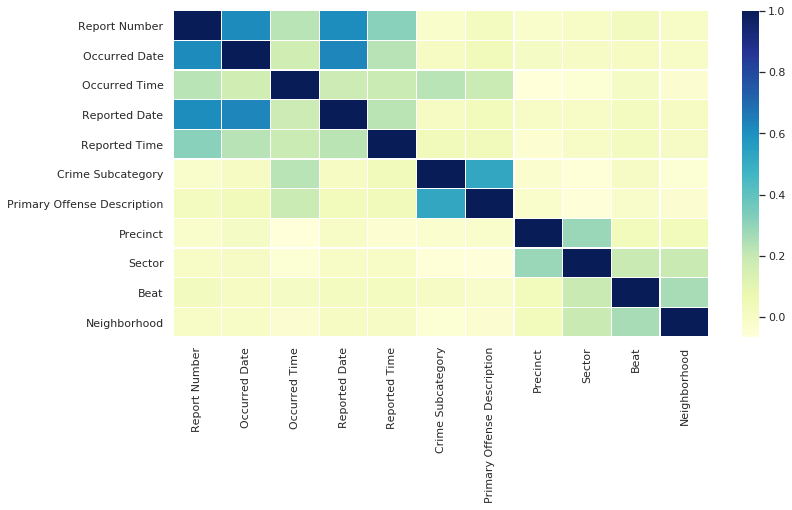

In [274]:
plt.figure(figsize=(12, 6))
corr = crime[['Report Number','Occurred Date', 'Occurred Time', 'Reported Date', 'Reported Time', 'Crime Subcategory','Primary Offense Description', 'Precinct', 'Sector', 'Beat', 'Neighborhood']].apply(lambda x: pd.factorize(x)[0]).corr()
display(corr)
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.2, cmap="YlGnBu")

In [0]:
crime['month']= crime['Occurred Date'].str[:2]

In [276]:

bins = pd.cut(crime['Occurred Time'], [0,100.0, 200.0, 300.0, 400.0, 500.0, 600.0, 700.0, 800.0, 900.0, 1000.0, 1100.0, 1200.0, 1300.0, 1400.0, 1500.0, 1600.0, 1700.0, 1800.0, 1900.0, 2000.0, 2100.0, 2200.0, 2300.0])
binnedDF=crime.groupby(bins)['Occurred Time'].agg(['count'])
binnedDF.head(25)


,count
Occurred Time,
"(0.0, 100.0]",222
"(100.0, 200.0]",160
"(200.0, 300.0]",123
"(300.0, 400.0]",83
"(400.0, 500.0]",61
"(500.0, 600.0]",77
"(600.0, 700.0]",107
"(700.0, 800.0]",129
"(800.0, 900.0]",145


In [277]:
binnedDF.sort_values('count', ascending=False)

,count
Occurred Time,
"(1700.0, 1800.0]",322
"(2100.0, 2200.0]",313
"(1600.0, 1700.0]",312
"(1800.0, 1900.0]",296
"(1900.0, 2000.0]",295
"(2000.0, 2100.0]",282
"(2200.0, 2300.0]",270
"(1100.0, 1200.0]",241
"(1400.0, 1500.0]",236


In [0]:
pivotTableDF= pd.pivot_table(crime, index=['Neighborhood', 'Crime Subcategory',  'Occurred Time', 'Occurred Date', 'Primary Offense Description'])

In [303]:
pivotTableDF.head(4)

Report Number  Reported Time
Neighborhood    Crime Subcategory     Occurred Time Occurred Date Primary Offense Description                               
ALASKA JUNCTION AGGRAVATED ASSAULT    1838.0        06/03/2018    ASSLT-AGG-WEAPON             20180000200860         1838.0
                AGGRAVATED ASSAULT-DV 243.0         07/28/2009    ASSLT-AGG-DV-WEAPON          20090000263474           50.0
                                      1804.0        11/15/2010    ASSLT-AGG-DV-BODYFORCE       20100000398961         1922.0
                BURGLARY-COMMERCIAL   0.0           01/15/2013    BURGLARY-FORCE-NONRES         2013000017268         1927.0

In [280]:
crime['Primary Offense Description'].unique()

array(['VEH-THEFT-AUTO', 'THEFT-BUILDING', 'NARC-FORGERY-PRESCRIPTION',
       'BURGLARY-FORCE-RES', 'THEFT-AUTOACC', 'THEFT-OTH',
       'THEFT-CARPROWL', 'BURGLARY-FORCE-NONRES', 'WEAPON-POSSESSION',
       'ASSLT-AGG-WEAPON', 'TRESPASS', 'PROSTITUTION-ASSIST-PROMOTE',
       'THEFT-LICENSE PLATE', 'THEFT-BICYCLE', 'THEFT-SHOPLIFT',
       'BURGLARY-NOFORCE-RES', 'ASSLT-AGG-GUN',
       'PROSTITUTION PATRONIZING', 'BURGLARY-NOFORCE-NONRES',
       'ARSON-VEHICLE', 'NARC-SELL-COCAINE', 'SEXOFF-INDECENT EXPOSURE',
       'DUI-LIQUOR', 'ASSLT-AGG-CHILD-BODYFORCE', 'CHILD-OTHER',
       'VEH-THEFT-TRUCK', 'ROBBERY-STREET-BODYFORCE',
       'ASSLT-AGG-DV-BODYFORCE', 'CHILD-NEGLECT', 'ARSON-OTHER',
       'ROBBERY-STREET-WEAPON', 'ROBBERY-BUSINESS-WEAPON',
       'ASSLT-AGG-BODYFORCE', 'WEAPON-UNLAWFUL USE', 'PROSTITUTION',
       'THEFT-PKPOCKET', 'THEFT-MAIL', 'ADULT-VULNERABLE-FINANCIAL',
       'ASSLT-AGG-DV-WEAPON', 'ROBBERY-STREET-GUN', 'SEXOFF-OTHER',
       'BURGLARY-SECURE PARKING

In [281]:
crime['Crime Subcategory'].unique()

array(['MOTOR VEHICLE THEFT', 'THEFT-BUILDING', 'NARCOTIC',
       'BURGLARY-RESIDENTIAL', 'CAR PROWL', 'THEFT-ALL OTHER',
       'BURGLARY-COMMERCIAL', 'WEAPON', 'AGGRAVATED ASSAULT', 'TRESPASS',
       'PROSTITUTION', 'THEFT-BICYCLE', 'THEFT-SHOPLIFT', 'ARSON',
       'SEX OFFENSE-OTHER', 'DUI', 'FAMILY OFFENSE-NONVIOLENT',
       'ROBBERY-STREET', 'AGGRAVATED ASSAULT-DV', 'ROBBERY-COMMERCIAL',
       'BURGLARY-RESIDENTIAL-SECURE PARKING', 'LIQUOR LAW VIOLATION',
       'ROBBERY-RESIDENTIAL', nan, 'RAPE', 'HOMICIDE',
       'BURGLARY-COMMERCIAL-SECURE PARKING', 'PORNOGRAPHY',
       'DISORDERLY CONDUCT'], dtype=object)

In [0]:
look_up = {'01': 'Jan', '02': 'Feb', '03': 'Mar', '04': 'Apr', '05': 'May', '06': 'Jun', '07': 'Jul', '08': 'Aug', '09': 'Sep', '10': 'Oct', '11': 'Nov', '12': 'Dec'}

In [0]:
crime['month'] = crime['month'].apply(lambda x: look_up[x])


In [284]:
crime.groupby('Crime Subcategory').size().sort_values(ascending=False)

Crime Subcategory
CAR PROWL                              1455
THEFT-ALL OTHER                         529
BURGLARY-RESIDENTIAL                    447
THEFT-SHOPLIFT                          443
MOTOR VEHICLE THEFT                     393
BURGLARY-COMMERCIAL                     215
THEFT-BUILDING                          186
TRESPASS                                172
AGGRAVATED ASSAULT                      154
NARCOTIC                                152
ROBBERY-STREET                          122
DUI                                     120
THEFT-BICYCLE                           114
AGGRAVATED ASSAULT-DV                    80
BURGLARY-RESIDENTIAL-SECURE PARKING      79
FAMILY OFFENSE-NONVIOLENT                70
SEX OFFENSE-OTHER                        69
WEAPON                                   51
ROBBERY-COMMERCIAL                       48
PROSTITUTION                             33
ARSON                                    18
RAPE                                     14
ROBBERY-RESIDE

In [285]:
dummy= pd.get_dummies(crime['month'])  # turns embarked into dummy variables
dummy.head(3)

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
76828,0,0,0,0,0,0,0,0,0,0,0,1
359046,0,0,0,0,1,0,0,0,0,0,0,0
466774,0,0,0,0,0,0,0,1,0,0,0,0


In [286]:
crimeDummy= pd.concat([crime, dummy], axis=1)
crimeDummy.head(3)

,Report Number,Occurred Date,Occurred Time,Reported Date,Reported Time,Crime Subcategory,Primary Offense Description,Precinct,Sector,Beat,Neighborhood,month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
76828,20090000344759,09/29/2009,1700.0,09/29/2009,1831.0,MOTOR VEHICLE THEFT,VEH-THEFT-AUTO,SOUTH,O,O1,SODO,Sep,0,0,0,0,0,0,0,0,0,0,0,1
359046,2016000018891,01/15/2016,2100.0,01/16/2016,2148.0,THEFT-BUILDING,THEFT-BUILDING,WEST,M,M3,DOWNTOWN COMMERCIAL,Jan,0,0,0,0,1,0,0,0,0,0,0,0
466774,2018000095124,03/16/2018,1700.0,03/16/2018,2125.0,THEFT-BUILDING,THEFT-BUILDING,EAST,E,E2,CAPITOL HILL,Mar,0,0,0,0,0,0,0,1,0,0,0,0


,Occurred Date,Occurred Time,Reported Date,Reported Time,Crime Subcategory,Primary Offense Description,Precinct,Sector,Beat,Neighborhood,month
Occurred Date,1.000000,0.168983,0.629124,0.232732,0.012911,0.037697,0.006930,0.005111,0.010416,-0.006080,0.025408
Occurred Time,0.168983,1.000000,0.180641,0.188744,0.226446,0.187896,-0.064923,-0.040653,0.008124,-0.034202,0.019231
Reported Date,0.629124,0.180641,1.000000,0.224583,0.013439,0.032735,-0.000415,-0.000751,0.018332,0.012578,0.030935
Reported Time,0.232732,0.188744,0.224583,1.000000,0.037000,0.035622,-0.036010,-0.005207,0.019790,0.003581,-0.004048
Crime Subcategory,0.012911,0.226446,0.013439,0.037000,1.000000,0.519612,-0.027437,-0.053293,0.005543,-0.043335,-0.003095
Primary Offense Description,0.037697,0.187896,0.032735,0.035622,0.519612,1.000000,-0.020256,-0.060090,-0.014760,-0.031646,-0.008505
Precinct,0.006930,-0.064923,-0.000415,-0.036010,-0.027437,-0.020256,1.000000,0.287603,0.034139,0.034471,0.001846
Sector,0.005111,-0.040653,-0.000751,-0.005207,-0.053293,-0.060090,0.287603,1.000000,0.189702,0.191802,0.006037
Beat,0.010416,0.008124,0.018332,0.019790,0.005543,-0.014760,0.034139,0.189702,1.000000,0.260980,-0.009841
Neighborhood,-0.006080,-0.034202,0.012578,0.003581,-0.043335,-0.031646,0.034471,0.191802,0.260980,1.000000,0.005560


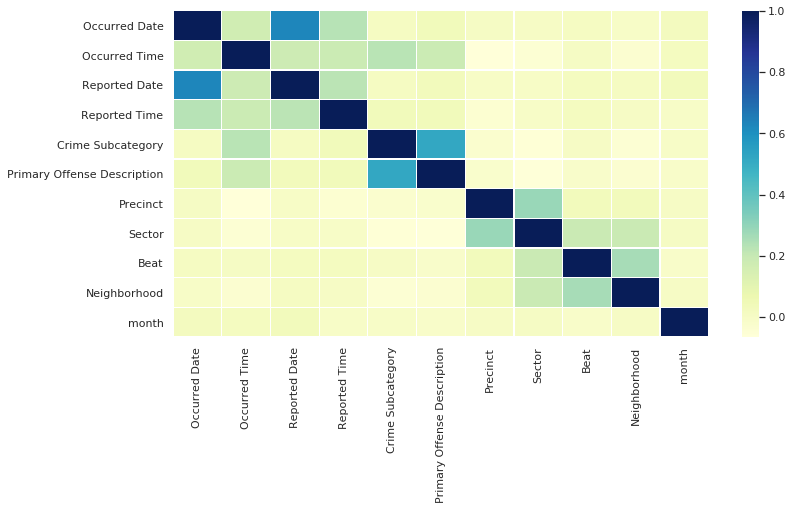

In [287]:
plt.figure(figsize=(12, 6))
corr = crime[['Occurred Date', 'Occurred Time', 'Reported Date', 'Reported Time', 'Crime Subcategory','Primary Offense Description', 'Precinct', 'Sector', 'Beat', 'Neighborhood', 'month']].apply(lambda x: pd.factorize(x)[0]).corr()
display(corr)
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.2, cmap="YlGnBu")